In [40]:
# Import Libaries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [49]:
df_grouped = df.copy()
df_grouped = df_grouped.reset_index()
df_grouped.rename(columns={'index': 'job_id'}, inplace=True)

In [50]:
df_grouped = df_grouped.groupby('job_title_short')


In [51]:
df_median = df_grouped.agg(
    median_salary = ('salary_year_avg', 'median'),
    job_count = ('job_id', 'count')
)

In [52]:
df_median

,median_salary,job_count
job_title_short,,
Business Analyst,85000.0,49063
Cloud Engineer,90000.0,12331
Data Analyst,90000.0,196075
Data Engineer,125000.0,186241
Data Scientist,127500.0,172286
Machine Learning Engineer,106415.0,14080
Senior Data Analyst,111175.0,29216
Senior Data Engineer,147500.0,44563
Senior Data Scientist,155500.0,36957


In [53]:
# Order the data frame with highest median salary at the top just for ease of viewing
df_median = df_median.sort_values(by='median_salary', ascending=False)

df_median

,median_salary,job_count
job_title_short,,
Senior Data Scientist,155500.0,36957
Senior Data Engineer,147500.0,44563
Data Scientist,127500.0,172286
Data Engineer,125000.0,186241
Senior Data Analyst,111175.0,29216
Machine Learning Engineer,106415.0,14080
Software Engineer,99150.0,44929
Cloud Engineer,90000.0,12331
Data Analyst,90000.0,196075


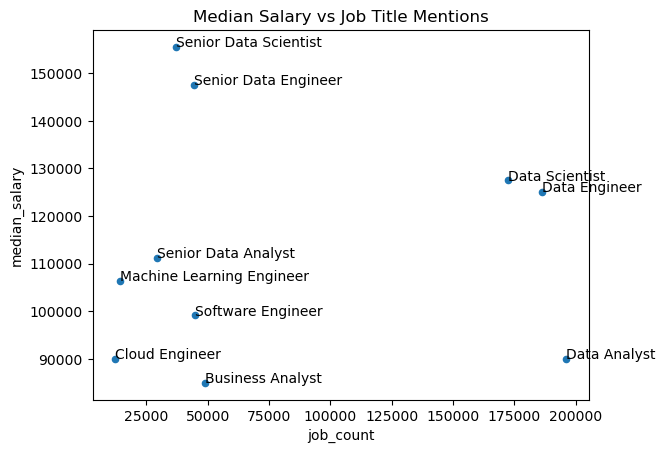

In [58]:
df_median.plot(kind='scatter', x = 'job_count', y = 'median_salary')
plt.title('Median Salary vs Job Title Mentions')
for i, txt in enumerate(df_median.index):
    plt.text(df_median['job_count'].iloc[i], df_median['median_salary'].iloc[i], txt)